In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Data count check

Note: train and test folders are swapped, original train folder had 318 images and original test folder had 3585 images

In [2]:
DATA_PATH = "../data/model_training"

In [14]:
print(
    f"""Train images: {len(os.listdir(f"{DATA_PATH}/train/images"))}
Train masks: {len(os.listdir(f"{DATA_PATH}/train/image_masks"))}

Validation images: {len(os.listdir(f"{DATA_PATH}/val/images"))}
Validation masks: {len(os.listdir(f"{DATA_PATH}/val/image_masks"))}

Test images: {len(os.listdir(f"{DATA_PATH}/test/images"))}
Test masks: {len(os.listdir(f"{DATA_PATH}/test/image_masks"))}"""
)

Train images: 3585
Train masks: 3167

Validation images: 236
Validation masks: 236

Test images: 318
Test masks: 318


418 missing masks in train set

In [15]:
test_mask_filenames = [
    s.split("_label")[0] for s in os.listdir(f"{DATA_PATH}/train/image_masks")
]
images_without_mask = []

for filename in os.listdir(f"{DATA_PATH}/train/images"):
    image_filename = filename.split(".")[0]

    if image_filename not in test_mask_filenames:
        images_without_mask.append(image_filename + ".png")

len(images_without_mask)

418

Look at 15 images that do not have masks and check if there are defects

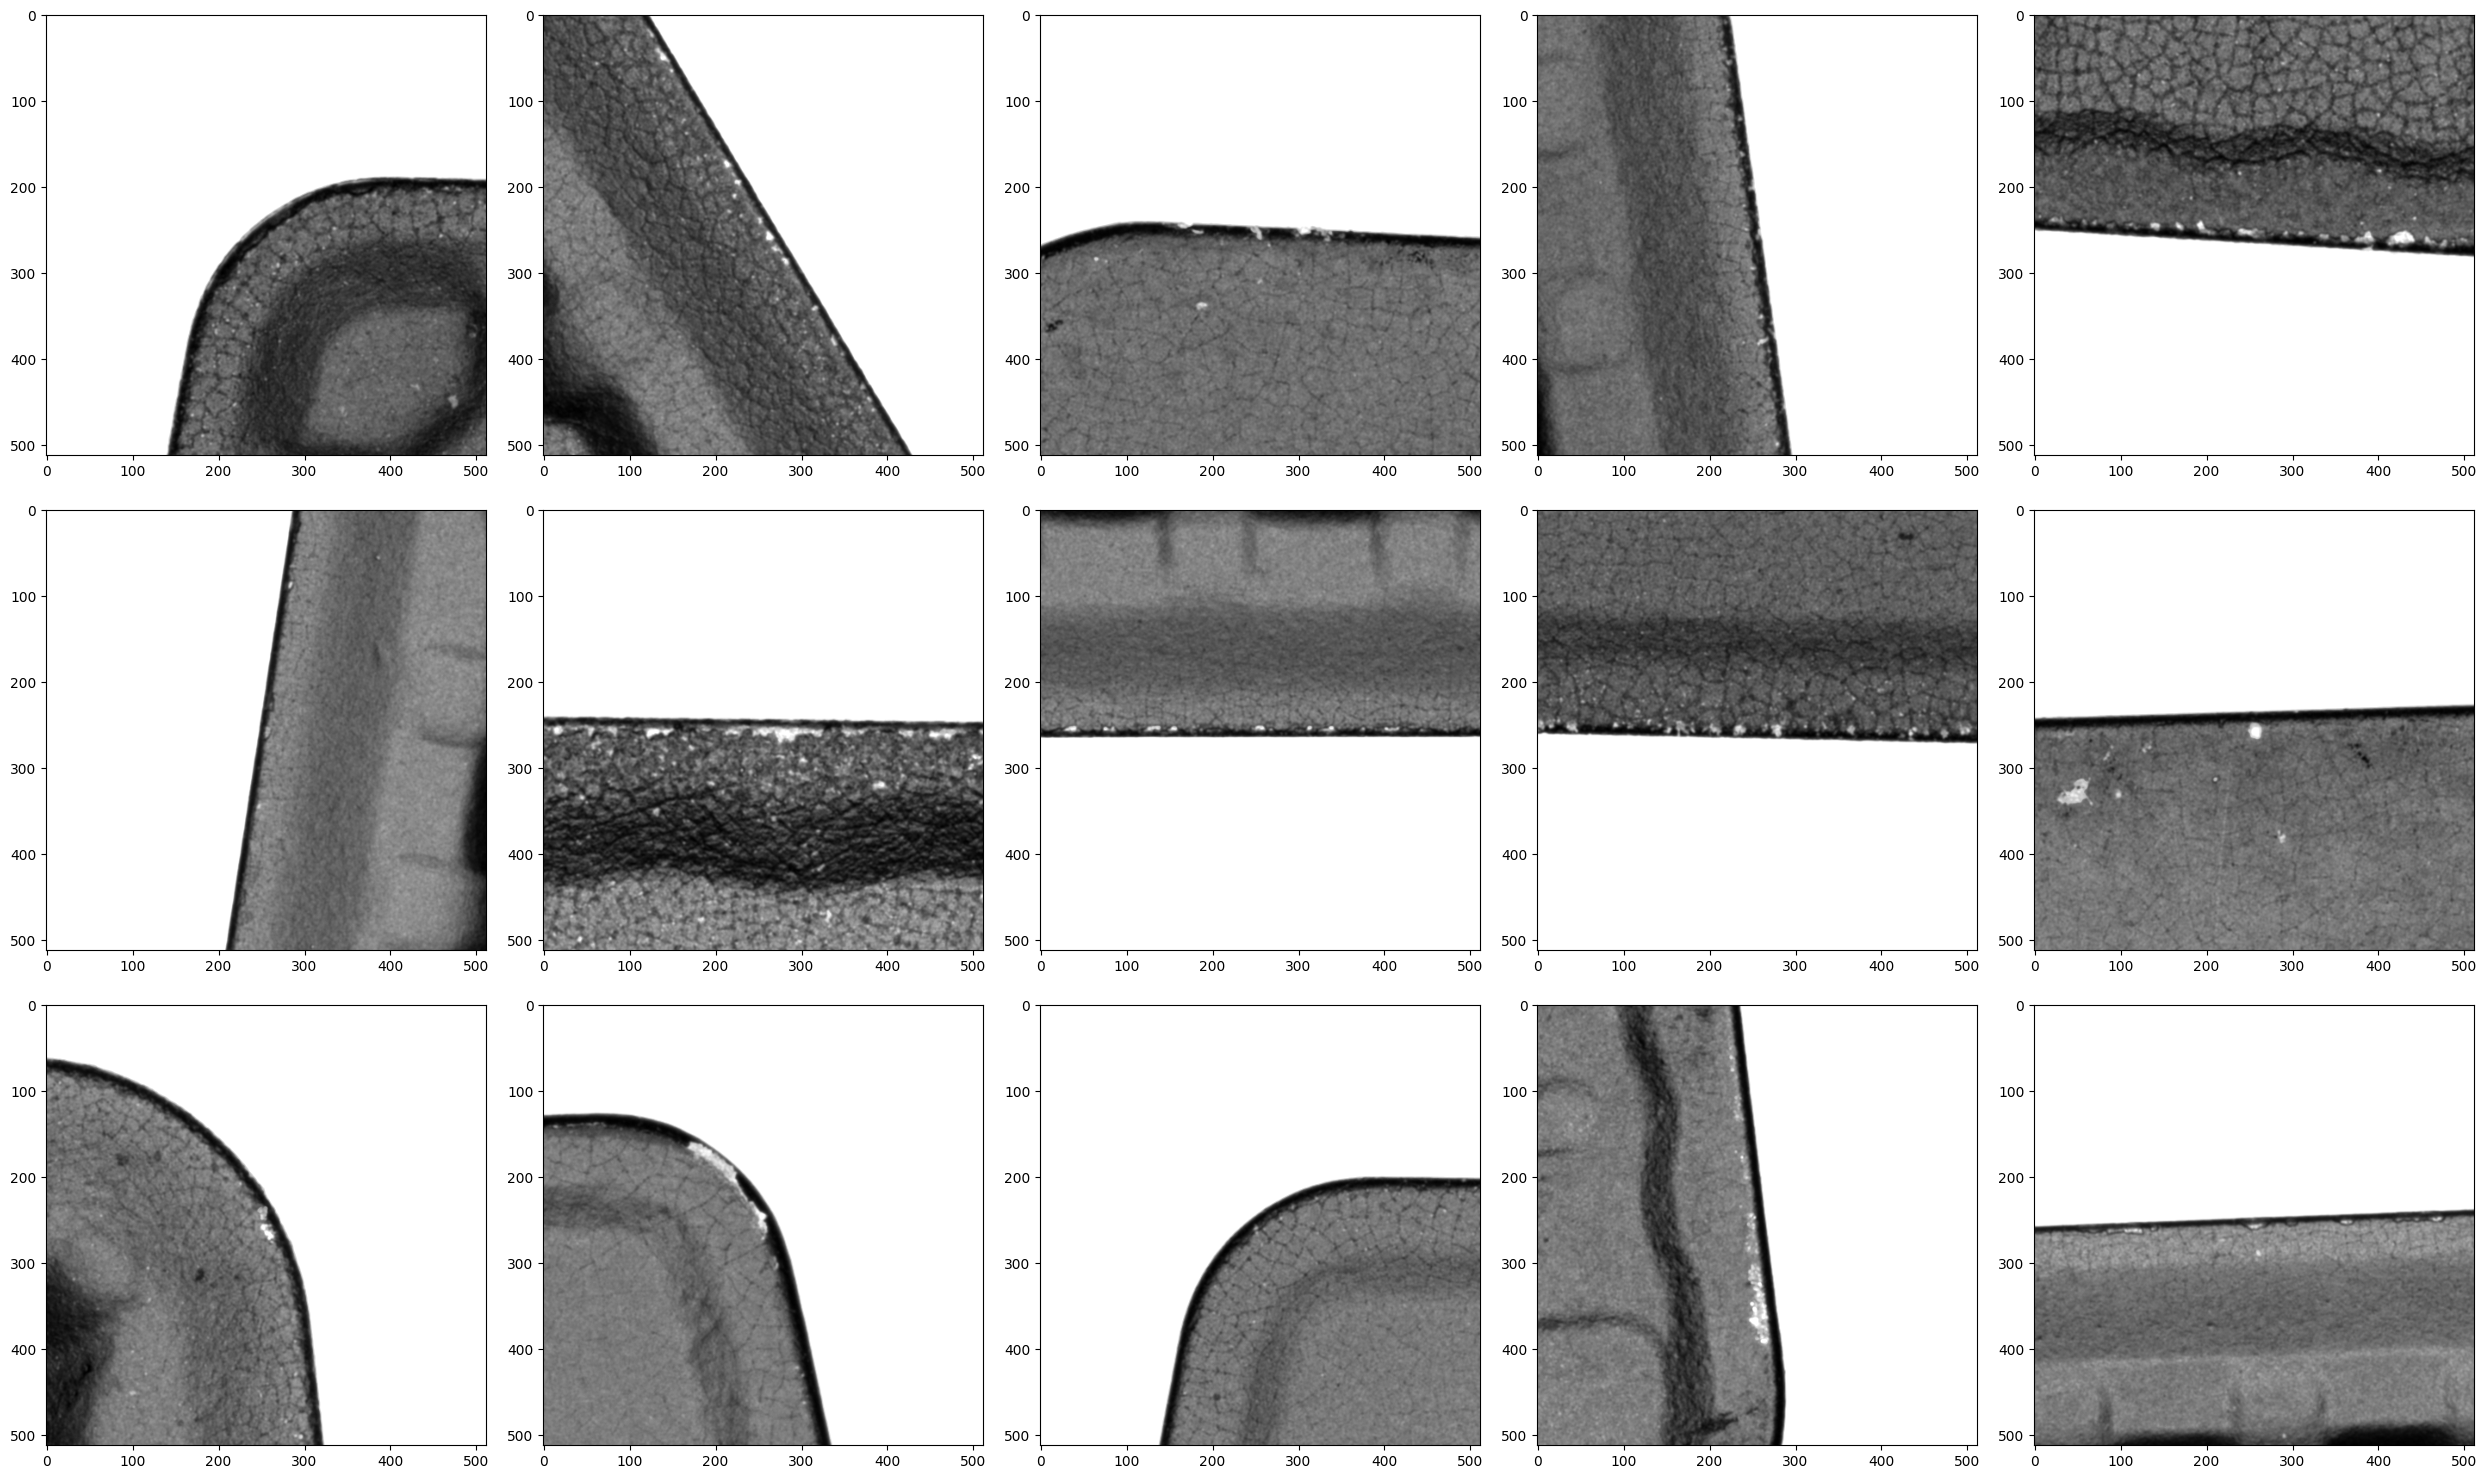

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(25, 15))

for i, ax in enumerate(axes.flat):
    filename = images_without_mask[i]
    img = np.asarray(Image.open(f"{DATA_PATH}/train/images/{filename}"))
    ax.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

Adhesion and chipping can be seen in these images, these images have to be removed as there are no corresponding masks

In [17]:
# move to images_without_mask folder
for filename in images_without_mask:
    os.rename(
        f"{DATA_PATH}/train/images/{filename}",
        f"{DATA_PATH}/images_without_mask/{filename}",
    )

In [18]:
print(
    f"""Train images: {len(os.listdir(f"{DATA_PATH}/train/images"))}
Train masks: {len(os.listdir(f"{DATA_PATH}/train/image_masks"))}

Validation images: {len(os.listdir(f"{DATA_PATH}/val/images"))}
Validation masks: {len(os.listdir(f"{DATA_PATH}/val/image_masks"))}

Test images: {len(os.listdir(f"{DATA_PATH}/test/images"))}
Test masks: {len(os.listdir(f"{DATA_PATH}/test/image_masks"))}"""
)

Train images: 3167
Train masks: 3167

Validation images: 236
Validation masks: 236

Test images: 318
Test masks: 318


Now, images and masks count are equal in the dataset

# Defect distribution

Check defect distribution for each dataset split

In [3]:
defect_count = {"train": {}, "val": {}, "test": {}}


for dataset_split in defect_count.keys():
    for filename in os.listdir(f"{DATA_PATH}/{dataset_split}/images"):
        label = filename.split("_")[0].lower()
        defect_count[dataset_split][label] = (
            defect_count[dataset_split].get(label, 0) + 1
        )

defect_count

{'train': {'glob': 494,
  'wheelhit': 226,
  'adhesion': 1049,
  'suspicious': 47,
  'chipping': 998,
  'contamination': 157,
  'crack': 1,
  'loosepowder': 71,
  'good': 10,
  'powderpullout': 73,
  'supplier': 13,
  'others': 3,
  'caking': 6,
  'powder': 13,
  'flash': 6},
 'val': {'adhesion': 87,
  'chipping': 67,
  'glob': 20,
  'flash': 1,
  'contamination': 20,
  'loosepowder': 13,
  'powderpullout': 11,
  'wheelhit': 12,
  'good': 1,
  'supplier': 2,
  'caking': 1,
  'crack': 1},
 'test': {'contamination': 35,
  'chipping': 91,
  'glob': 27,
  'adhesion': 77,
  'wheelhit': 19,
  'flash': 2,
  'powderpullout': 26,
  'loosepowder': 25,
  'good': 7,
  'suspicious': 1,
  'supplier': 8}}